The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [2]:
import subprocess
import sys
# disclaimer: AI Generated

# Function to install a package
def install_package(package):
    try:
        __import__(package)  # Try to import the package
    except ImportError:
        print(f"{package} not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    else:
        print(f"{package} is already installed.")

# List of required packages
required_packages = ["seaborn", "wordcloud", "matplotlib", "pandas"]

# Install required packages
for package in required_packages:
    install_package(package)


seaborn is already installed.
wordcloud is already installed.
matplotlib is already installed.
pandas is already installed.


In [3]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv('data/nobel.csv')

In [4]:
df['decade'] = (df['year'] // 10) * 10

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 


selection=['full_name', 'birth_country', 'sex', 'category', 'year',]
print(df[selection].head(), end=f"\n{'-'*50}\n")
print(df.info(), end=f"\n{'-'*50}\n")



                      full_name     birth_country   sex    category  year
0  Jacobus Henricus van 't Hoff       Netherlands  Male   Chemistry  1901
1               Sully Prudhomme            France  Male  Literature  1901
2        Emil Adolf von Behring  Prussia (Poland)  Male    Medicine  1901
3             Jean Henry Dunant       Switzerland  Male       Peace  1901
4                Frédéric Passy            France  Male       Peace  1901
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 

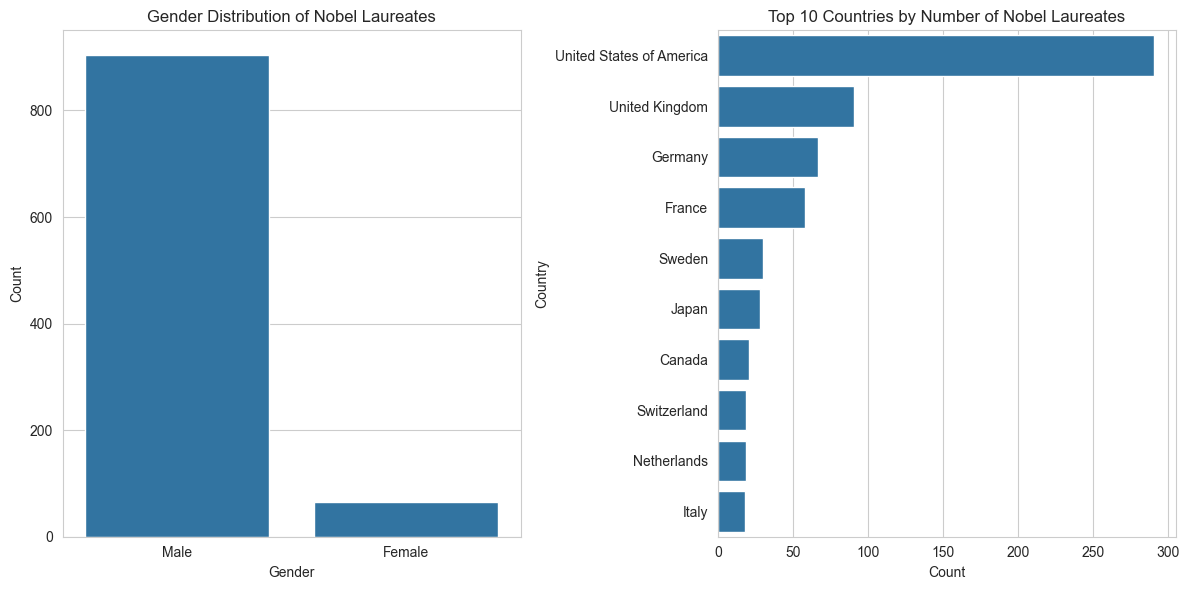

In [5]:
# Create frequency tables
gender_count = df['sex'].value_counts()
country_count= df['birth_country'].value_counts()

# Plotting the gender distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title('Gender Distribution of Nobel Laureates')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plotting the top 10 countries by number of laureates
top_10_countries = country_count.head(10)

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)
plt.title('Top 10 Countries by Number of Nobel Laureates')
plt.xlabel('Count')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

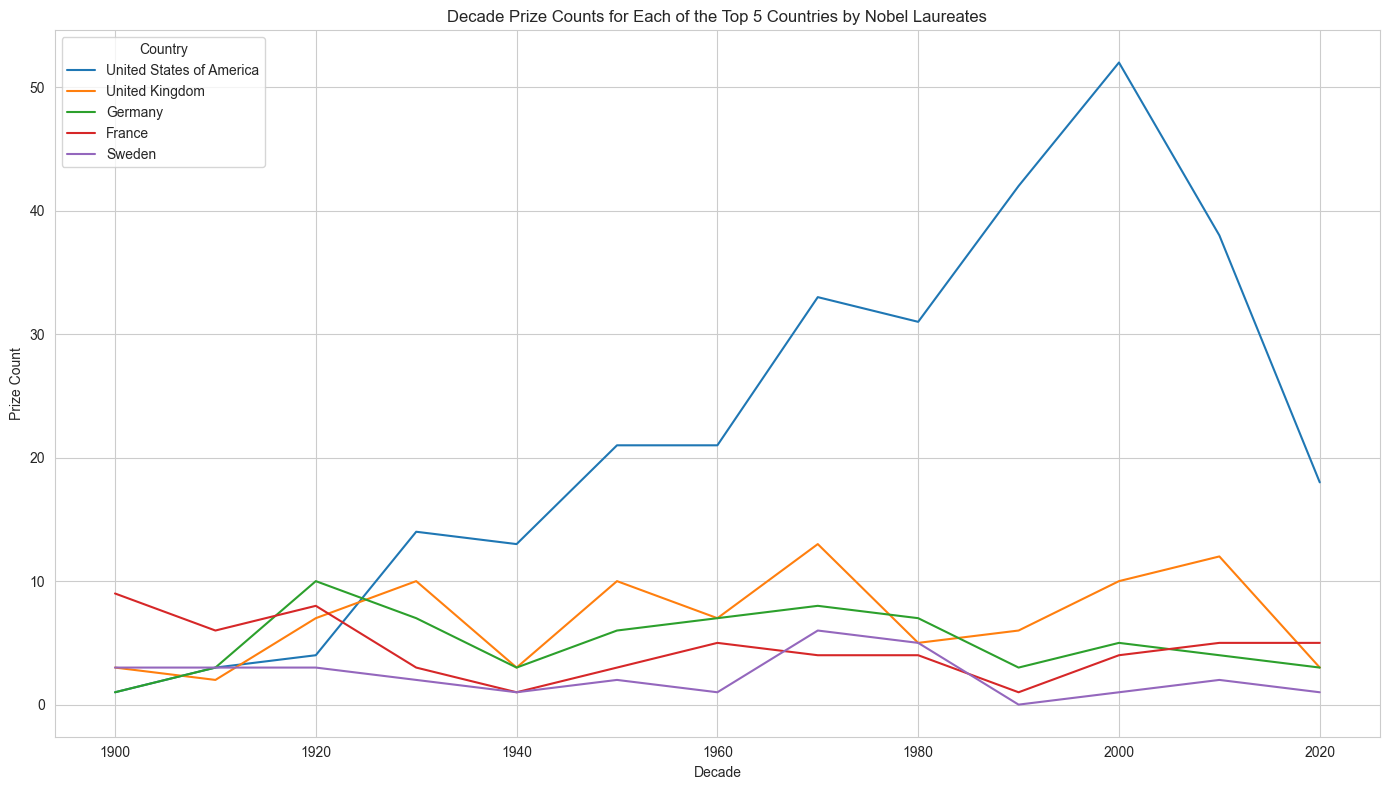

In [6]:
# Calculate the decade prize counts for each country
decade_prize_counts = df.groupby(['birth_country', 'decade']).size().unstack(fill_value=0)

# Get the top 10 countries by number of laureates
top_5_countries = df['birth_country'].value_counts().head(5).index

# Filter the decade prize counts for the top 10 countries
top_5_decade_prize_counts = decade_prize_counts.loc[top_5_countries]

# Plotting the decade prize counts for each of the top 10 countries
plt.figure(figsize=(14, 8))

for country in top_5_countries:
    sns.lineplot(data=top_5_decade_prize_counts.loc[country], label=country)

plt.title('Decade Prize Counts for Each of the Top 5 Countries by Nobel Laureates')
plt.xlabel('Decade')
plt.ylabel('Prize Count')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

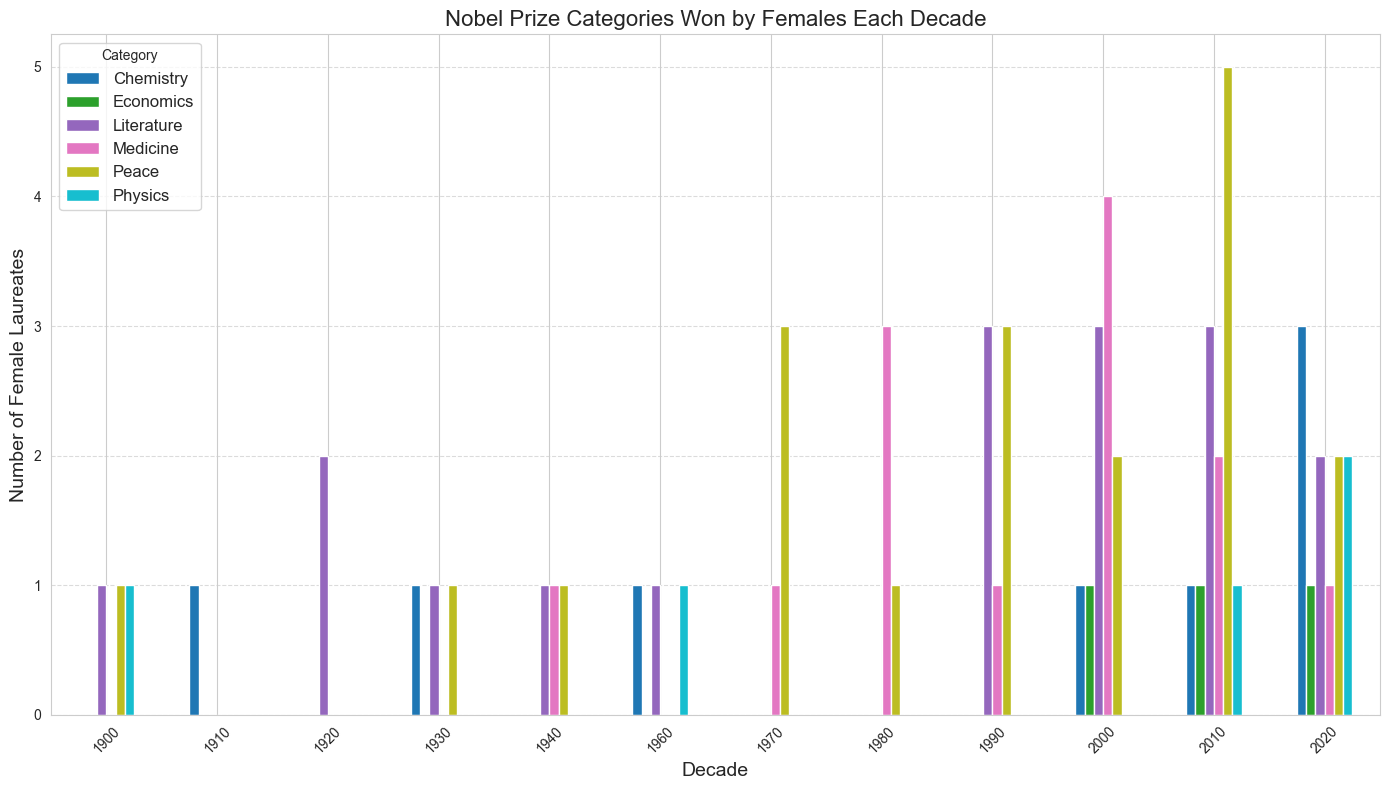

In [7]:

# Filter the DataFrame for female laureates
df_female = df[df['sex'] == 'Female']

# Group by decade and category, then count laureates
grouped_female = df_female.groupby(['decade', 'category']).size().reset_index(name='female_laureates')

# Pivot the data for easier plotting
pivot_female = grouped_female.pivot(index='decade', columns='category', values='female_laureates').fillna(0)

# Plot the data
plt.figure(figsize=(12, 8))

# Create a grouped bar chart
pivot_female.plot(kind='bar', stacked=False, figsize=(14, 8), cmap='tab10')

# Add labels and title
plt.title('Nobel Prize Categories Won by Females Each Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Female Laureates', fontsize=14)
plt.legend(title='Category', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
fem1 = df[df['sex']=='Female'].sort_values('year').iloc[0]
first_woman_name = fem1['full_name']
first_woman_category = fem1['category']
print(first_woman_name)
print(first_woman_category)


Marie Curie, née Sklodowska
Physics


In [9]:
# orgs = df['organization_name'].value_counts()
inds = df['full_name'].value_counts()
# orgs = orgs[orgs>=2].index.tolist()
inds = inds[inds>=2].index.tolist()
repeat_list= inds
print(repeat_list)


['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


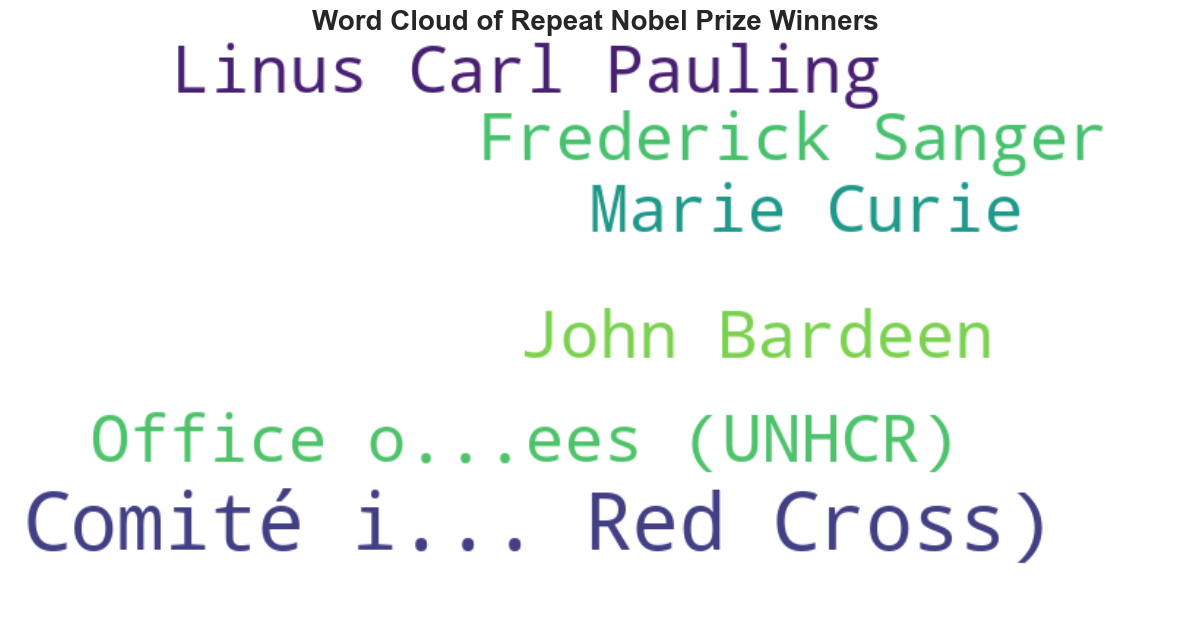

In [10]:
repeat_df = df[df['full_name'].isin(repeat_list)]
# Define a custom function to trim lengthy names
def trim_text(text, max_length=20):
    text=text.split(',')[0]
    
    if len(text) > max_length:
        return text[:max_length//2 - 2] + "..." + text[-max_length//2-1:]  # Truncate and add ellipsis
    return text

# Preprocess the data: trim names
repeat_dict = {
    trim_text(name): count for name, count in repeat_df['full_name'].value_counts().to_dict().items()
}

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    contour_color="black",
    contour_width=1
).generate_from_frequencies(repeat_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off axes
plt.title("Word Cloud of Repeat Nobel Prize Winners", fontsize=20, weight="bold")

# Show the plot
plt.tight_layout()
plt.show()
